In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

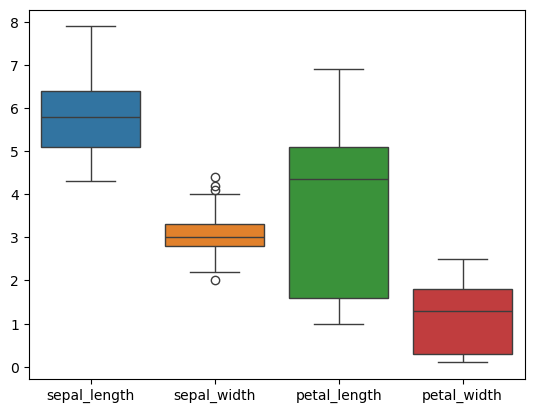

In [10]:
sns.boxplot(data)

In [4]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [30]:
X = data.drop("species", axis=1)
y = data['species']

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
y_labeled = le.fit_transform(y)

In [38]:
y_labeled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y_labeled, test_size=0.3, random_state=10)

In [41]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=10)
dtc.fit(X_train2, y_train2)
pred2 = dtc.predict(X_test2)
print(classification_report(y_test2, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [12]:
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state=10)

# Sequential

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
X_train.shape

(105, 4)

In [17]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax' ))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


2024-09-09 16:19:43.821420: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 16:19:43.823794: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) RX Vega 11 Graphics)
2024-09-09 16:19:43.937879: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:19:43.937949: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-09 16:19:43.937976: I tensorflow/core/common_runtime/pluggable_device/pluggab

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=150, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)                    

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.0647 - accuracy: 0.9619

2024-09-09 16:33:44.051784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 16:33:44.122274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:33:44.122376: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 825ms/step - loss: 0.0647 - accuracy: 0.9619 - val_loss: 0.0328 - val_accuracy: 0.9778
Epoch 2/500
1/1 [==============================] - 0s 89ms/step - loss: 0.0645 - accuracy: 0.9810 - val_loss: 0.0337 - val_accuracy: 0.9778
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9619

2024-09-09 16:33:44.394589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 16:33:44.432227: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 16:33:44.432307: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 110ms/step - loss: 0.0643 - accuracy: 0.9619 - val_loss: 0.0342 - val_accuracy: 0.9778
Epoch 4/500
1/1 [==============================] - 0s 93ms/step - loss: 0.0642 - accuracy: 0.9619 - val_loss: 0.0343 - val_accuracy: 0.9778
Epoch 5/500
1/1 [==============================] - 0s 97ms/step - loss: 0.0640 - accuracy: 0.9714 - val_loss: 0.0344 - val_accuracy: 0.9778
Epoch 6/500
1/1 [==============================] - 0s 99ms/step - loss: 0.0639 - accuracy: 0.9714 - val_loss: 0.0342 - val_accuracy: 0.9778
Epoch 7/500
1/1 [==============================] - 0s 91ms/step - loss: 0.0638 - accuracy: 0.9714 - val_loss: 0.0341 - val_accuracy: 0.9778
Epoch 8/500
1/1 [==============================] - 0s 96ms/step - loss: 0.0637 - accuracy: 0.9714 - val_loss: 0.0340 - val_accuracy: 0.9778
Epoch 9/500
1/1 [==============================] - 0s 98ms/step - loss: 0.0636 - accuracy: 0.9714 - val_loss: 0.0341 - val_accuracy: 0.9778
Epoch 10/500
1/1 [=============

1/1 [==============================] - 0s 87ms/step - loss: 0.0599 - accuracy: 0.9810 - val_loss: 0.0289 - val_accuracy: 0.9778
Epoch 62/500
1/1 [==============================] - 0s 85ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.0289 - val_accuracy: 0.9778
Epoch 63/500
1/1 [==============================] - 0s 85ms/step - loss: 0.0597 - accuracy: 0.9810 - val_loss: 0.0288 - val_accuracy: 0.9778
Epoch 64/500
1/1 [==============================] - 0s 81ms/step - loss: 0.0597 - accuracy: 0.9810 - val_loss: 0.0287 - val_accuracy: 0.9778
Epoch 65/500
1/1 [==============================] - 0s 82ms/step - loss: 0.0596 - accuracy: 0.9810 - val_loss: 0.0286 - val_accuracy: 0.9778
Epoch 66/500
1/1 [==============================] - 0s 75ms/step - loss: 0.0596 - accuracy: 0.9810 - val_loss: 0.0286 - val_accuracy: 0.9778
Epoch 67/500
1/1 [==============================] - 0s 111ms/step - loss: 0.0595 - accuracy: 0.9810 - val_loss: 0.0286 - val_accuracy: 0.9778
Epoch 68/500
1/1 [=======

1/1 [==============================] - 0s 86ms/step - loss: 0.0571 - accuracy: 0.9810 - val_loss: 0.0264 - val_accuracy: 0.9778
Epoch 120/500
1/1 [==============================] - 0s 90ms/step - loss: 0.0570 - accuracy: 0.9810 - val_loss: 0.0264 - val_accuracy: 0.9778
Epoch 121/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0570 - accuracy: 0.9810 - val_loss: 0.0265 - val_accuracy: 0.9778
Epoch 122/500
1/1 [==============================] - 0s 86ms/step - loss: 0.0569 - accuracy: 0.9810 - val_loss: 0.0265 - val_accuracy: 0.9778
Epoch 123/500
1/1 [==============================] - 0s 83ms/step - loss: 0.0569 - accuracy: 0.9810 - val_loss: 0.0265 - val_accuracy: 0.9778
Epoch 124/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0569 - accuracy: 0.9810 - val_loss: 0.0263 - val_accuracy: 0.9778
Epoch 125/500
1/1 [==============================] - 0s 81ms/step - loss: 0.0568 - accuracy: 0.9810 - val_loss: 0.0262 - val_accuracy: 0.9778
Epoch 126/500
1/1 [=

Epoch 177/500
1/1 [==============================] - 0s 100ms/step - loss: 0.0552 - accuracy: 0.9810 - val_loss: 0.0249 - val_accuracy: 0.9778
Epoch 178/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0552 - accuracy: 0.9810 - val_loss: 0.0249 - val_accuracy: 0.9778
Epoch 179/500
1/1 [==============================] - 0s 80ms/step - loss: 0.0552 - accuracy: 0.9810 - val_loss: 0.0248 - val_accuracy: 0.9778
Epoch 180/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0551 - accuracy: 0.9810 - val_loss: 0.0248 - val_accuracy: 0.9778
Epoch 181/500
1/1 [==============================] - 0s 90ms/step - loss: 0.0551 - accuracy: 0.9810 - val_loss: 0.0247 - val_accuracy: 0.9778
Epoch 182/500
1/1 [==============================] - 0s 89ms/step - loss: 0.0551 - accuracy: 0.9810 - val_loss: 0.0247 - val_accuracy: 0.9778
Epoch 183/500
1/1 [==============================] - 0s 88ms/step - loss: 0.0551 - accuracy: 0.9810 - val_loss: 0.0247 - val_accuracy: 0.9778
Epoch

1/1 [==============================] - 0s 75ms/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.0238 - val_accuracy: 0.9778
Epoch 235/500
1/1 [==============================] - 0s 81ms/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.0237 - val_accuracy: 0.9778
Epoch 236/500
1/1 [==============================] - 0s 80ms/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.0237 - val_accuracy: 0.9778
Epoch 237/500
1/1 [==============================] - 0s 90ms/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.0237 - val_accuracy: 0.9778
Epoch 238/500
1/1 [==============================] - 0s 91ms/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.0237 - val_accuracy: 0.9778
Epoch 239/500
1/1 [==============================] - 0s 89ms/step - loss: 0.0539 - accuracy: 0.9810 - val_loss: 0.0236 - val_accuracy: 0.9778
Epoch 240/500
1/1 [==============================] - 0s 77ms/step - loss: 0.0539 - accuracy: 0.9810 - val_loss: 0.0237 - val_accuracy: 0.9778
Epoch 241/500
1/1 [=

Epoch 292/500
1/1 [==============================] - 0s 86ms/step - loss: 0.0533 - accuracy: 0.9810 - val_loss: 0.0230 - val_accuracy: 0.9778
Epoch 293/500
1/1 [==============================] - 0s 83ms/step - loss: 0.0533 - accuracy: 0.9810 - val_loss: 0.0230 - val_accuracy: 0.9778
Epoch 294/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0532 - accuracy: 0.9810 - val_loss: 0.0230 - val_accuracy: 0.9778
Epoch 295/500
1/1 [==============================] - 0s 75ms/step - loss: 0.0532 - accuracy: 0.9810 - val_loss: 0.0230 - val_accuracy: 0.9778
Epoch 296/500
1/1 [==============================] - 0s 83ms/step - loss: 0.0532 - accuracy: 0.9810 - val_loss: 0.0229 - val_accuracy: 0.9778
Epoch 297/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0532 - accuracy: 0.9810 - val_loss: 0.0229 - val_accuracy: 0.9778
Epoch 298/500
1/1 [==============================] - 0s 101ms/step - loss: 0.0532 - accuracy: 0.9810 - val_loss: 0.0229 - val_accuracy: 0.9778
Epoch

1/1 [==============================] - 0s 98ms/step - loss: 0.0528 - accuracy: 0.9810 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 350/500
1/1 [==============================] - 0s 93ms/step - loss: 0.0528 - accuracy: 0.9810 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 351/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0528 - accuracy: 0.9810 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 352/500
1/1 [==============================] - 0s 88ms/step - loss: 0.0528 - accuracy: 0.9810 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 353/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0528 - accuracy: 0.9810 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 354/500
1/1 [==============================] - 0s 73ms/step - loss: 0.0528 - accuracy: 0.9810 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 355/500
1/1 [==============================] - 0s 85ms/step - loss: 0.0528 - accuracy: 0.9810 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 356/500
1/1 [=

Epoch 407/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0525 - accuracy: 0.9810 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 408/500
1/1 [==============================] - 0s 98ms/step - loss: 0.0525 - accuracy: 0.9810 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 409/500
1/1 [==============================] - 0s 78ms/step - loss: 0.0524 - accuracy: 0.9810 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 410/500
1/1 [==============================] - 0s 81ms/step - loss: 0.0524 - accuracy: 0.9810 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 411/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0524 - accuracy: 0.9810 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 412/500
1/1 [==============================] - 0s 70ms/step - loss: 0.0524 - accuracy: 0.9810 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 413/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0524 - accuracy: 0.9810 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 

Epoch 465/500
1/1 [==============================] - 0s 96ms/step - loss: 0.0522 - accuracy: 0.9810 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 466/500
1/1 [==============================] - 0s 79ms/step - loss: 0.0522 - accuracy: 0.9810 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 467/500
1/1 [==============================] - 0s 79ms/step - loss: 0.0522 - accuracy: 0.9810 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 468/500
1/1 [==============================] - 0s 81ms/step - loss: 0.0522 - accuracy: 0.9810 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 469/500
1/1 [==============================] - 0s 82ms/step - loss: 0.0522 - accuracy: 0.9810 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 470/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0522 - accuracy: 0.9810 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 471/500
1/1 [==============================] - 0s 91ms/step - loss: 0.0522 - accuracy: 0.9810 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 

2024-09-09 16:34:31.336426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

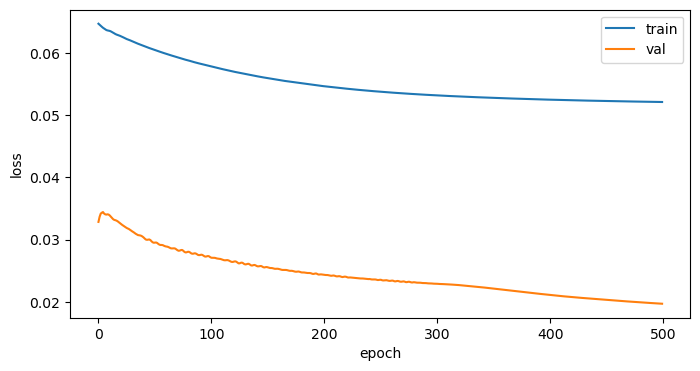

In [29]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 함수형 

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [47]:
len(X_train.columns)

4

In [49]:
X_train.shape[1]

4

In [50]:
inputs = Input(shape=(X_train.shape[1],))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

In [51]:
model = Model(inputs, x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(X_train, y_train, epochs=400, batch_size=150, validation_data=(X_test, y_test))

Epoch 1/400
1/1 [==============================] - ETA: 0s - loss: 1.1581 - accuracy: 0.3143

2024-09-09 17:22:35.014087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:22:35.080965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:22:35.081049: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 811ms/step - loss: 1.1581 - accuracy: 0.3143 - val_loss: 1.1085 - val_accuracy: 0.3778
Epoch 2/400
1/1 [==============================] - 0s 73ms/step - loss: 1.1534 - accuracy: 0.3143 - val_loss: 1.1049 - val_accuracy: 0.3778
Epoch 3/400
1/1 [==============================] - ETA: 0s - loss: 1.1488 - accuracy: 0.3143

2024-09-09 17:22:35.315886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:22:35.349469: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:22:35.349575: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 105ms/step - loss: 1.1488 - accuracy: 0.3143 - val_loss: 1.1014 - val_accuracy: 0.3778
Epoch 4/400
1/1 [==============================] - 0s 88ms/step - loss: 1.1442 - accuracy: 0.3143 - val_loss: 1.0978 - val_accuracy: 0.3778
Epoch 5/400
1/1 [==============================] - 0s 98ms/step - loss: 1.1397 - accuracy: 0.3143 - val_loss: 1.0942 - val_accuracy: 0.3778
Epoch 6/400
1/1 [==============================] - 0s 75ms/step - loss: 1.1352 - accuracy: 0.3143 - val_loss: 1.0907 - val_accuracy: 0.3778
Epoch 7/400
1/1 [==============================] - 0s 87ms/step - loss: 1.1308 - accuracy: 0.3143 - val_loss: 1.0873 - val_accuracy: 0.3778
Epoch 8/400
1/1 [==============================] - 0s 84ms/step - loss: 1.1264 - accuracy: 0.3143 - val_loss: 1.0839 - val_accuracy: 0.3778
Epoch 9/400
1/1 [==============================] - 0s 92ms/step - loss: 1.1220 - accuracy: 0.3143 - val_loss: 1.0805 - val_accuracy: 0.3778
Epoch 10/400
1/1 [=============

1/1 [==============================] - 0s 119ms/step - loss: 0.9538 - accuracy: 0.4381 - val_loss: 0.9438 - val_accuracy: 0.4667
Epoch 62/400
1/1 [==============================] - 0s 89ms/step - loss: 0.9512 - accuracy: 0.4476 - val_loss: 0.9416 - val_accuracy: 0.5111
Epoch 63/400
1/1 [==============================] - 0s 78ms/step - loss: 0.9487 - accuracy: 0.4571 - val_loss: 0.9394 - val_accuracy: 0.5111
Epoch 64/400
1/1 [==============================] - 0s 81ms/step - loss: 0.9462 - accuracy: 0.4952 - val_loss: 0.9371 - val_accuracy: 0.5111
Epoch 65/400
1/1 [==============================] - 0s 112ms/step - loss: 0.9437 - accuracy: 0.5333 - val_loss: 0.9349 - val_accuracy: 0.5111
Epoch 66/400
1/1 [==============================] - 0s 114ms/step - loss: 0.9412 - accuracy: 0.5524 - val_loss: 0.9327 - val_accuracy: 0.5111
Epoch 67/400
1/1 [==============================] - 0s 125ms/step - loss: 0.9387 - accuracy: 0.5524 - val_loss: 0.9305 - val_accuracy: 0.5111
Epoch 68/400
1/1 [====

Epoch 119/400
1/1 [==============================] - 0s 102ms/step - loss: 0.8233 - accuracy: 0.6667 - val_loss: 0.8265 - val_accuracy: 0.6222
Epoch 120/400
1/1 [==============================] - 0s 78ms/step - loss: 0.8214 - accuracy: 0.6762 - val_loss: 0.8248 - val_accuracy: 0.6222
Epoch 121/400
1/1 [==============================] - 0s 86ms/step - loss: 0.8195 - accuracy: 0.6762 - val_loss: 0.8231 - val_accuracy: 0.6222
Epoch 122/400
1/1 [==============================] - 0s 96ms/step - loss: 0.8176 - accuracy: 0.6762 - val_loss: 0.8213 - val_accuracy: 0.6222
Epoch 123/400
1/1 [==============================] - 0s 132ms/step - loss: 0.8157 - accuracy: 0.6762 - val_loss: 0.8196 - val_accuracy: 0.6222
Epoch 124/400
1/1 [==============================] - 0s 120ms/step - loss: 0.8138 - accuracy: 0.6762 - val_loss: 0.8179 - val_accuracy: 0.6222
Epoch 125/400
1/1 [==============================] - 0s 92ms/step - loss: 0.8118 - accuracy: 0.6762 - val_loss: 0.8162 - val_accuracy: 0.6222
Epo

1/1 [==============================] - 0s 110ms/step - loss: 0.7078 - accuracy: 0.7048 - val_loss: 0.7204 - val_accuracy: 0.6444
Epoch 177/400
1/1 [==============================] - 0s 113ms/step - loss: 0.7056 - accuracy: 0.7048 - val_loss: 0.7183 - val_accuracy: 0.6444
Epoch 178/400
1/1 [==============================] - 0s 89ms/step - loss: 0.7033 - accuracy: 0.7048 - val_loss: 0.7162 - val_accuracy: 0.6444
Epoch 179/400
1/1 [==============================] - 0s 93ms/step - loss: 0.7010 - accuracy: 0.7048 - val_loss: 0.7141 - val_accuracy: 0.6444
Epoch 180/400
1/1 [==============================] - 0s 79ms/step - loss: 0.6987 - accuracy: 0.7048 - val_loss: 0.7120 - val_accuracy: 0.6444
Epoch 181/400
1/1 [==============================] - 0s 82ms/step - loss: 0.6964 - accuracy: 0.7048 - val_loss: 0.7099 - val_accuracy: 0.6444
Epoch 182/400
1/1 [==============================] - 0s 90ms/step - loss: 0.6941 - accuracy: 0.7048 - val_loss: 0.7078 - val_accuracy: 0.6444
Epoch 183/400
1/1 

Epoch 234/400
1/1 [==============================] - 0s 76ms/step - loss: 0.5656 - accuracy: 0.7524 - val_loss: 0.5893 - val_accuracy: 0.6889
Epoch 235/400
1/1 [==============================] - 0s 80ms/step - loss: 0.5631 - accuracy: 0.7524 - val_loss: 0.5869 - val_accuracy: 0.6889
Epoch 236/400
1/1 [==============================] - 0s 91ms/step - loss: 0.5606 - accuracy: 0.7524 - val_loss: 0.5846 - val_accuracy: 0.6889
Epoch 237/400
1/1 [==============================] - 0s 71ms/step - loss: 0.5581 - accuracy: 0.7524 - val_loss: 0.5822 - val_accuracy: 0.6889
Epoch 238/400
1/1 [==============================] - 0s 77ms/step - loss: 0.5557 - accuracy: 0.7524 - val_loss: 0.5799 - val_accuracy: 0.7111
Epoch 239/400
1/1 [==============================] - 0s 86ms/step - loss: 0.5532 - accuracy: 0.7524 - val_loss: 0.5775 - val_accuracy: 0.7111
Epoch 240/400
1/1 [==============================] - 0s 83ms/step - loss: 0.5508 - accuracy: 0.7524 - val_loss: 0.5752 - val_accuracy: 0.7111
Epoch 

1/1 [==============================] - 0s 137ms/step - loss: 0.4368 - accuracy: 0.8667 - val_loss: 0.4619 - val_accuracy: 0.8444
Epoch 292/400
1/1 [==============================] - 0s 122ms/step - loss: 0.4348 - accuracy: 0.8667 - val_loss: 0.4598 - val_accuracy: 0.8444
Epoch 293/400
1/1 [==============================] - 0s 96ms/step - loss: 0.4328 - accuracy: 0.8667 - val_loss: 0.4578 - val_accuracy: 0.8444
Epoch 294/400
1/1 [==============================] - 0s 76ms/step - loss: 0.4309 - accuracy: 0.8667 - val_loss: 0.4557 - val_accuracy: 0.8444
Epoch 295/400
1/1 [==============================] - 0s 86ms/step - loss: 0.4289 - accuracy: 0.8667 - val_loss: 0.4537 - val_accuracy: 0.8444
Epoch 296/400
1/1 [==============================] - 0s 89ms/step - loss: 0.4269 - accuracy: 0.8667 - val_loss: 0.4517 - val_accuracy: 0.8444
Epoch 297/400
1/1 [==============================] - 0s 96ms/step - loss: 0.4250 - accuracy: 0.8667 - val_loss: 0.4496 - val_accuracy: 0.8444
Epoch 298/400
1/1 

1/1 [==============================] - 0s 117ms/step - loss: 0.3321 - accuracy: 0.9429 - val_loss: 0.3532 - val_accuracy: 0.9333
Epoch 349/400
1/1 [==============================] - 0s 84ms/step - loss: 0.3304 - accuracy: 0.9429 - val_loss: 0.3513 - val_accuracy: 0.9333
Epoch 350/400
1/1 [==============================] - 0s 92ms/step - loss: 0.3287 - accuracy: 0.9429 - val_loss: 0.3494 - val_accuracy: 0.9333
Epoch 351/400
1/1 [==============================] - 0s 86ms/step - loss: 0.3269 - accuracy: 0.9429 - val_loss: 0.3476 - val_accuracy: 0.9333
Epoch 352/400
1/1 [==============================] - 0s 95ms/step - loss: 0.3252 - accuracy: 0.9429 - val_loss: 0.3457 - val_accuracy: 0.9333
Epoch 353/400
1/1 [==============================] - 0s 124ms/step - loss: 0.3235 - accuracy: 0.9429 - val_loss: 0.3439 - val_accuracy: 0.9333
Epoch 354/400
1/1 [==============================] - 0s 141ms/step - loss: 0.3219 - accuracy: 0.9429 - val_loss: 0.3421 - val_accuracy: 0.9333
Epoch 355/400
1/1

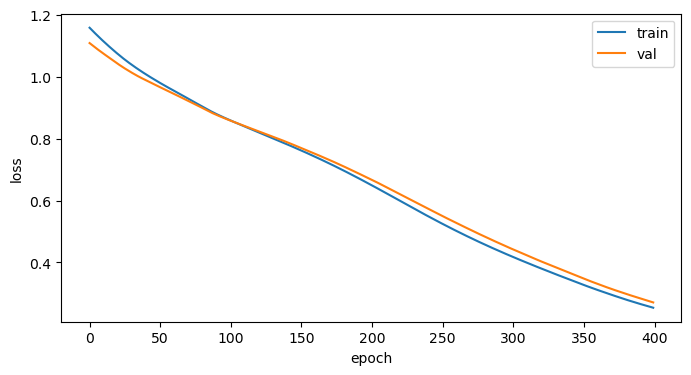

In [53]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 클래스형

In [54]:
import tensorflow as tf

In [63]:
class Iris(Model):
    def __init__(self):
        super(Iris, self).__init__()
        self.dense1 = Dense(16, activation='relu')
        self.dense2 = Dense(8, activation='relu')
        self.classifier = Dense(3, activation='softmax')
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.classifier(x)

In [64]:
y_train

,Iris-setosa,Iris-versicolor,Iris-virginica
32,True,False,False
52,False,True,False
70,False,True,False
121,False,False,True
144,False,False,True
...,...,...,...
113,False,False,True
64,False,True,False
15,True,False,False
125,False,False,True


In [65]:
model = Iris()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=150, validation_data=(X_test, y_test))

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 1.0174 - accuracy: 0.4095

2024-09-09 17:31:58.826863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:31:58.900938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:31:58.901083: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 845ms/step - loss: 1.0174 - accuracy: 0.4095 - val_loss: 0.9890 - val_accuracy: 0.5111
Epoch 2/500
1/1 [==============================] - 0s 91ms/step - loss: 1.0127 - accuracy: 0.4000 - val_loss: 0.9861 - val_accuracy: 0.5333
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 1.0080 - accuracy: 0.3714

2024-09-09 17:31:59.152957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:31:59.191578: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:31:59.191657: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 106ms/step - loss: 1.0080 - accuracy: 0.3714 - val_loss: 0.9832 - val_accuracy: 0.4889
Epoch 4/500
1/1 [==============================] - 0s 105ms/step - loss: 1.0035 - accuracy: 0.3810 - val_loss: 0.9807 - val_accuracy: 0.4222
Epoch 5/500
1/1 [==============================] - 0s 93ms/step - loss: 0.9993 - accuracy: 0.3905 - val_loss: 0.9782 - val_accuracy: 0.3778
Epoch 6/500
1/1 [==============================] - 0s 95ms/step - loss: 0.9952 - accuracy: 0.3619 - val_loss: 0.9759 - val_accuracy: 0.3111
Epoch 7/500
1/1 [==============================] - 0s 92ms/step - loss: 0.9912 - accuracy: 0.3524 - val_loss: 0.9736 - val_accuracy: 0.3111
Epoch 8/500
1/1 [==============================] - 0s 81ms/step - loss: 0.9875 - accuracy: 0.3429 - val_loss: 0.9714 - val_accuracy: 0.3111
Epoch 9/500
1/1 [==============================] - 0s 76ms/step - loss: 0.9838 - accuracy: 0.3429 - val_loss: 0.9693 - val_accuracy: 0.3111
Epoch 10/500
1/1 [============

1/1 [==============================] - 0s 90ms/step - loss: 0.8287 - accuracy: 0.6857 - val_loss: 0.8418 - val_accuracy: 0.6222
Epoch 62/500
1/1 [==============================] - 0s 87ms/step - loss: 0.8256 - accuracy: 0.6857 - val_loss: 0.8390 - val_accuracy: 0.6222
Epoch 63/500
1/1 [==============================] - 0s 80ms/step - loss: 0.8225 - accuracy: 0.6857 - val_loss: 0.8362 - val_accuracy: 0.6222
Epoch 64/500
1/1 [==============================] - 0s 86ms/step - loss: 0.8194 - accuracy: 0.6857 - val_loss: 0.8334 - val_accuracy: 0.6222
Epoch 65/500
1/1 [==============================] - 0s 85ms/step - loss: 0.8163 - accuracy: 0.6857 - val_loss: 0.8305 - val_accuracy: 0.6222
Epoch 66/500
1/1 [==============================] - 0s 84ms/step - loss: 0.8132 - accuracy: 0.6857 - val_loss: 0.8276 - val_accuracy: 0.6222
Epoch 67/500
1/1 [==============================] - 0s 91ms/step - loss: 0.8101 - accuracy: 0.6857 - val_loss: 0.8247 - val_accuracy: 0.6222
Epoch 68/500
1/1 [========

1/1 [==============================] - 0s 86ms/step - loss: 0.6196 - accuracy: 0.7429 - val_loss: 0.6388 - val_accuracy: 0.6667
Epoch 120/500
1/1 [==============================] - 0s 84ms/step - loss: 0.6160 - accuracy: 0.7429 - val_loss: 0.6352 - val_accuracy: 0.6667
Epoch 121/500
1/1 [==============================] - 0s 78ms/step - loss: 0.6123 - accuracy: 0.7429 - val_loss: 0.6317 - val_accuracy: 0.6667
Epoch 122/500
1/1 [==============================] - 0s 82ms/step - loss: 0.6087 - accuracy: 0.7429 - val_loss: 0.6282 - val_accuracy: 0.6667
Epoch 123/500
1/1 [==============================] - 0s 88ms/step - loss: 0.6051 - accuracy: 0.7524 - val_loss: 0.6247 - val_accuracy: 0.6889
Epoch 124/500
1/1 [==============================] - 0s 80ms/step - loss: 0.6015 - accuracy: 0.7619 - val_loss: 0.6213 - val_accuracy: 0.6889
Epoch 125/500
1/1 [==============================] - 0s 90ms/step - loss: 0.5979 - accuracy: 0.7619 - val_loss: 0.6178 - val_accuracy: 0.6889
Epoch 126/500
1/1 [=

Epoch 177/500
1/1 [==============================] - 0s 95ms/step - loss: 0.4331 - accuracy: 0.9238 - val_loss: 0.4517 - val_accuracy: 0.9111
Epoch 178/500
1/1 [==============================] - 0s 84ms/step - loss: 0.4305 - accuracy: 0.9238 - val_loss: 0.4490 - val_accuracy: 0.9111
Epoch 179/500
1/1 [==============================] - 0s 126ms/step - loss: 0.4279 - accuracy: 0.9333 - val_loss: 0.4463 - val_accuracy: 0.9111
Epoch 180/500
1/1 [==============================] - 0s 121ms/step - loss: 0.4253 - accuracy: 0.9333 - val_loss: 0.4436 - val_accuracy: 0.9111
Epoch 181/500
1/1 [==============================] - 0s 107ms/step - loss: 0.4227 - accuracy: 0.9429 - val_loss: 0.4409 - val_accuracy: 0.9111
Epoch 182/500
1/1 [==============================] - 0s 84ms/step - loss: 0.4202 - accuracy: 0.9429 - val_loss: 0.4382 - val_accuracy: 0.9111
Epoch 183/500
1/1 [==============================] - 0s 87ms/step - loss: 0.4177 - accuracy: 0.9429 - val_loss: 0.4356 - val_accuracy: 0.9111
Epo

1/1 [==============================] - 0s 137ms/step - loss: 0.3151 - accuracy: 0.9524 - val_loss: 0.3260 - val_accuracy: 0.9556
Epoch 235/500
1/1 [==============================] - 0s 112ms/step - loss: 0.3134 - accuracy: 0.9524 - val_loss: 0.3241 - val_accuracy: 0.9556
Epoch 236/500
1/1 [==============================] - 0s 103ms/step - loss: 0.3118 - accuracy: 0.9524 - val_loss: 0.3223 - val_accuracy: 0.9556
Epoch 237/500
1/1 [==============================] - 0s 101ms/step - loss: 0.3102 - accuracy: 0.9524 - val_loss: 0.3205 - val_accuracy: 0.9556
Epoch 238/500
1/1 [==============================] - 0s 118ms/step - loss: 0.3086 - accuracy: 0.9524 - val_loss: 0.3187 - val_accuracy: 0.9556
Epoch 239/500
1/1 [==============================] - 0s 139ms/step - loss: 0.3070 - accuracy: 0.9524 - val_loss: 0.3170 - val_accuracy: 0.9556
Epoch 240/500
1/1 [==============================] - 0s 108ms/step - loss: 0.3054 - accuracy: 0.9524 - val_loss: 0.3152 - val_accuracy: 0.9556
Epoch 241/500

1/1 [==============================] - 0s 108ms/step - loss: 0.2368 - accuracy: 0.9619 - val_loss: 0.2392 - val_accuracy: 0.9556
Epoch 292/500
1/1 [==============================] - 0s 76ms/step - loss: 0.2357 - accuracy: 0.9619 - val_loss: 0.2380 - val_accuracy: 0.9556
Epoch 293/500
1/1 [==============================] - 0s 83ms/step - loss: 0.2346 - accuracy: 0.9619 - val_loss: 0.2367 - val_accuracy: 0.9556
Epoch 294/500
1/1 [==============================] - 0s 98ms/step - loss: 0.2334 - accuracy: 0.9619 - val_loss: 0.2355 - val_accuracy: 0.9556
Epoch 295/500
1/1 [==============================] - 0s 89ms/step - loss: 0.2323 - accuracy: 0.9619 - val_loss: 0.2342 - val_accuracy: 0.9556
Epoch 296/500
1/1 [==============================] - 0s 87ms/step - loss: 0.2312 - accuracy: 0.9619 - val_loss: 0.2330 - val_accuracy: 0.9556
Epoch 297/500
1/1 [==============================] - 0s 87ms/step - loss: 0.2301 - accuracy: 0.9619 - val_loss: 0.2318 - val_accuracy: 0.9556
Epoch 298/500
1/1 [

Epoch 349/500
1/1 [==============================] - 0s 117ms/step - loss: 0.1827 - accuracy: 0.9619 - val_loss: 0.1784 - val_accuracy: 0.9778
Epoch 350/500
1/1 [==============================] - 0s 88ms/step - loss: 0.1820 - accuracy: 0.9619 - val_loss: 0.1776 - val_accuracy: 0.9778
Epoch 351/500
1/1 [==============================] - 0s 92ms/step - loss: 0.1812 - accuracy: 0.9619 - val_loss: 0.1767 - val_accuracy: 0.9778
Epoch 352/500
1/1 [==============================] - 0s 145ms/step - loss: 0.1805 - accuracy: 0.9619 - val_loss: 0.1758 - val_accuracy: 0.9778
Epoch 353/500
1/1 [==============================] - 0s 136ms/step - loss: 0.1798 - accuracy: 0.9619 - val_loss: 0.1749 - val_accuracy: 0.9778
Epoch 354/500
1/1 [==============================] - 0s 97ms/step - loss: 0.1790 - accuracy: 0.9619 - val_loss: 0.1740 - val_accuracy: 0.9778
Epoch 355/500
1/1 [==============================] - 0s 83ms/step - loss: 0.1783 - accuracy: 0.9619 - val_loss: 0.1731 - val_accuracy: 0.9778
Epo

1/1 [==============================] - 0s 127ms/step - loss: 0.1477 - accuracy: 0.9619 - val_loss: 0.1374 - val_accuracy: 0.9778
Epoch 407/500
1/1 [==============================] - 0s 129ms/step - loss: 0.1472 - accuracy: 0.9619 - val_loss: 0.1368 - val_accuracy: 0.9778
Epoch 408/500
1/1 [==============================] - 0s 95ms/step - loss: 0.1467 - accuracy: 0.9619 - val_loss: 0.1362 - val_accuracy: 0.9778
Epoch 409/500
1/1 [==============================] - 0s 93ms/step - loss: 0.1462 - accuracy: 0.9619 - val_loss: 0.1357 - val_accuracy: 0.9778
Epoch 410/500
1/1 [==============================] - 0s 123ms/step - loss: 0.1458 - accuracy: 0.9619 - val_loss: 0.1351 - val_accuracy: 0.9778
Epoch 411/500
1/1 [==============================] - 0s 137ms/step - loss: 0.1453 - accuracy: 0.9619 - val_loss: 0.1345 - val_accuracy: 0.9778
Epoch 412/500
1/1 [==============================] - 0s 111ms/step - loss: 0.1448 - accuracy: 0.9619 - val_loss: 0.1340 - val_accuracy: 0.9778
Epoch 413/500
1

1/1 [==============================] - 0s 139ms/step - loss: 0.1243 - accuracy: 0.9524 - val_loss: 0.1099 - val_accuracy: 0.9778
Epoch 464/500
1/1 [==============================] - 0s 139ms/step - loss: 0.1240 - accuracy: 0.9524 - val_loss: 0.1094 - val_accuracy: 0.9778
Epoch 465/500
1/1 [==============================] - 0s 101ms/step - loss: 0.1236 - accuracy: 0.9524 - val_loss: 0.1090 - val_accuracy: 0.9778
Epoch 466/500
1/1 [==============================] - 0s 89ms/step - loss: 0.1233 - accuracy: 0.9524 - val_loss: 0.1087 - val_accuracy: 0.9778
Epoch 467/500
1/1 [==============================] - 0s 128ms/step - loss: 0.1230 - accuracy: 0.9524 - val_loss: 0.1083 - val_accuracy: 0.9778
Epoch 468/500
1/1 [==============================] - 0s 138ms/step - loss: 0.1226 - accuracy: 0.9524 - val_loss: 0.1079 - val_accuracy: 0.9778
Epoch 469/500
1/1 [==============================] - 0s 120ms/step - loss: 0.1223 - accuracy: 0.9524 - val_loss: 0.1075 - val_accuracy: 0.9778
Epoch 470/500


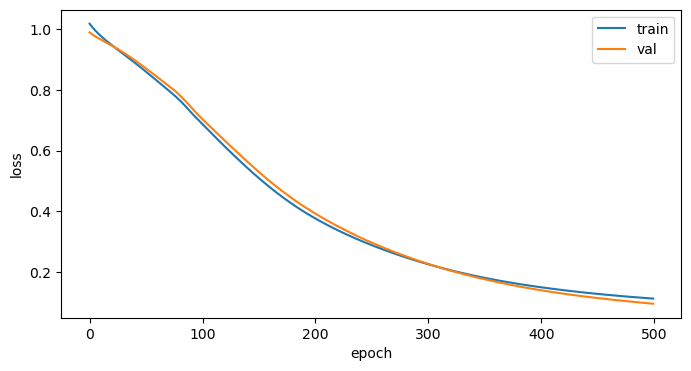

In [66]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()